In [1]:
import pandas as pd
import matplotlib
BAY_AREA = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", header=0)

In [2]:
ca_df_mar = df[(df['state']=='California')&(df['date'] > '2020-02-28')]
ca_df_mar

,date,county,state,fips,cases,deaths
377,2020-02-29,Humboldt,California,6023.0,1,0
378,2020-02-29,Los Angeles,California,6037.0,1,0
379,2020-02-29,Marin,California,6041.0,1,0
380,2020-02-29,Napa,California,6055.0,1,0
381,2020-02-29,Orange,California,6059.0,1,0
...,...,...,...,...,...,...
14205,2020-03-27,Tulare,California,6107.0,24,0
14206,2020-03-27,Unknown,California,NaN,1,0
14207,2020-03-27,Ventura,California,6111.0,83,3
14208,2020-03-27,Yolo,California,6113.0,16,1


In [3]:
by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='cases', fill_value=0)[BAY_AREA]
by_county_by_date

county,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
date,,,,,,,,,
2020-02-29,0,0,1,1,3,0,4,11,1
2020-03-01,1,0,1,1,3,0,7,12,1
2020-03-02,1,0,1,1,3,1,9,12,2
2020-03-03,2,1,1,1,3,1,11,12,2
2020-03-04,2,1,1,1,3,1,14,12,3
2020-03-05,2,1,1,1,5,1,20,12,3
2020-03-06,3,4,1,1,5,1,24,12,3
2020-03-07,3,4,1,1,11,1,32,12,3
2020-03-08,3,9,1,1,11,1,37,12,3


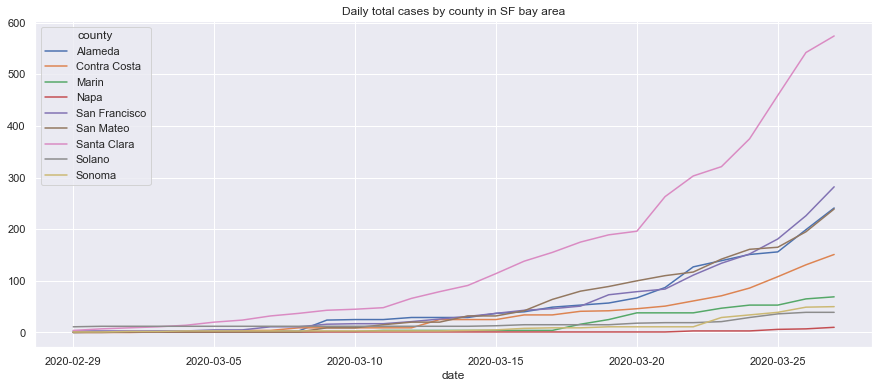

In [30]:
by_county_by_date.plot.line(figsize=(15,6), title='Daily total cases by county in SF bay area')

In [24]:
by_county_by_date_diff = by_county_by_date.diff().iloc[1:]
by_county_by_date_diff

county,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
date,,,,,,,,,
2020-03-01,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
2020-03-02,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0
2020-03-03,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
2020-03-05,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0
2020-03-06,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2020-03-07,0.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,0.0
2020-03-08,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2020-03-09,21.0,0.0,1.0,0.0,5.0,8.0,6.0,0.0,0.0


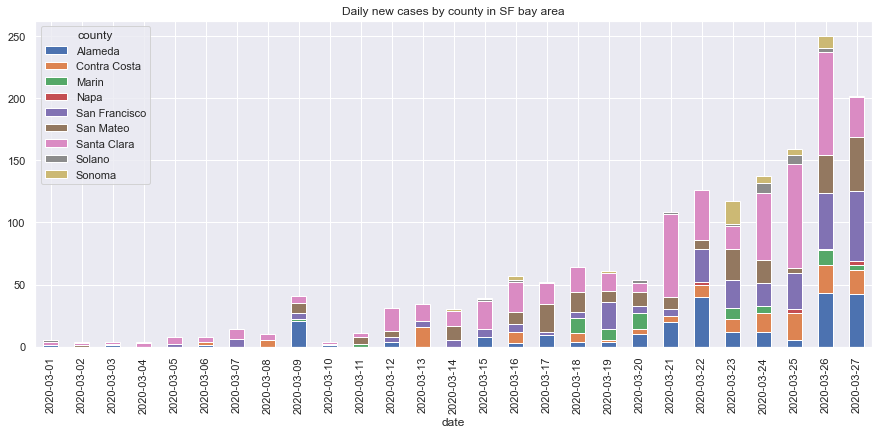

In [31]:
by_county_by_date_diff.plot.bar(stacked=True, figsize=(15,6), title='Daily new cases by county in SF bay area')

In [27]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

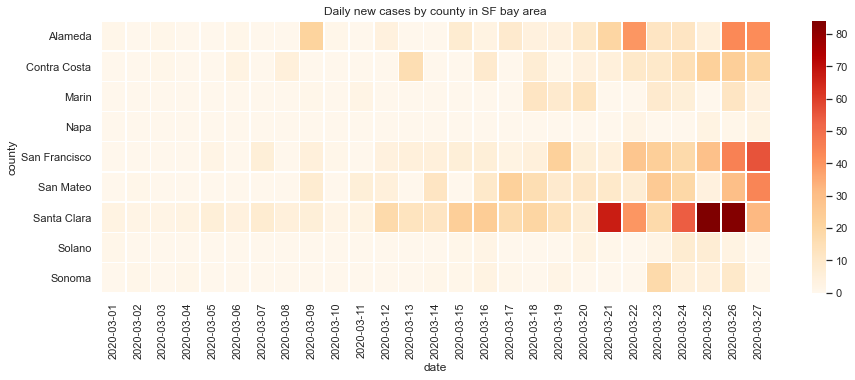

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Daily new cases by county in SF bay area')
sns.heatmap(by_county_by_date_diff.T, cmap="OrRd",linewidths=.5, ax=ax)